In [2]:
import warnings
import pandas as pd
# %matplotlib.inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path= 'Data/stud.csv'

df= pd.read_csv(data_path)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
value= df['gender'].value_counts()

value

gender
female    518
male      482
Name: count, dtype: int64

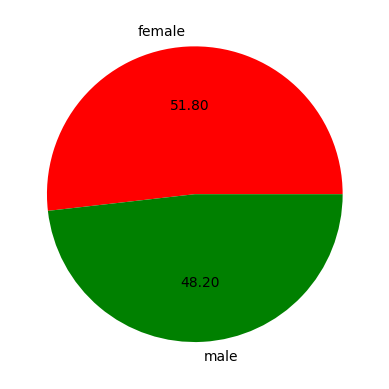

In [6]:
X= value.values
y= value.index

plt.pie(X, labels= y, colors=['Red','Green'], autopct= '%.2f')
plt.show()

In [7]:
df['total_score']= df['math score'] + df['writing score'] + df['reading score']

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [8]:
df.drop(columns=['math score','reading score','writing score'], inplace= True)


In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
total_score                    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   total_score                  1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [12]:
print('Summary Analysis of Numerical Features:')
df.describe()

Summary Analysis of Numerical Features:


,total_score
count,1000.000000
mean,203.312000
std,42.771978
min,27.000000
25%,175.000000
50%,205.000000
75%,233.000000
max,300.000000


In [13]:
print('Summary of Categorical Fetaures:')
df.describe(include=['O'])

Summary of Categorical Fetaures:


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [14]:
df.rename( columns={'race/ethnicity':'ethinicity'} , inplace= True) 


In [15]:
def get_unique(columns):
    print(f'The Unique Values Present in the {columns} is :' ,df[columns].unique())
    print(f'The Number of  Unique Values Present in the {columns} is :' ,df[columns].nunique())
    return

get_unique('gender')
get_unique('ethinicity')
get_unique('parental level of education')
get_unique('lunch')
get_unique('test preparation course')


     



The Unique Values Present in the gender is : ['female' 'male']
The Number of  Unique Values Present in the gender is : 2
The Unique Values Present in the ethinicity is : ['group B' 'group C' 'group A' 'group D' 'group E']
The Number of  Unique Values Present in the ethinicity is : 5
The Unique Values Present in the parental level of education is : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The Number of  Unique Values Present in the parental level of education is : 6
The Unique Values Present in the lunch is : ['standard' 'free/reduced']
The Number of  Unique Values Present in the lunch is : 2
The Unique Values Present in the test preparation course is : ['none' 'completed']
The Number of  Unique Values Present in the test preparation course is : 2


In [16]:
df.drop_duplicates(inplace= True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.head()

,gender,ethinicity,parental level of education,lunch,test preparation course,total_score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


In [19]:
df['total_score'].describe()

count    984.000000
mean     203.231707
std       43.023866
min       27.000000
25%      174.750000
50%      205.000000
75%      234.000000
max      300.000000
Name: total_score, dtype: float64

In [20]:
df[df['total_score']==27]

,gender,ethinicity,parental level of education,lunch,test preparation course,total_score
59,female,group C,some high school,free/reduced,none,27


In [21]:
numerical_features= [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features= [things for things in df.columns if df[things].dtype == 'O']


numerical_features, categorical_features

(['total_score'],
 ['gender',
  'ethinicity',
  'parental level of education',
  'lunch',
  'test preparation course'])

In [22]:
print("We Have {} number of numerical features".format(len(numerical_features)),numerical_features)
print("\nWe Have {} number of categorical features".format(len(categorical_features)),categorical_features)

We Have 1 number of numerical features ['total_score']

We Have 5 number of categorical features ['gender', 'ethinicity', 'parental level of education', 'lunch', 'test preparation course']


In [23]:
df['average_score']= df['total_score'] / 3

In [24]:
df.head()

,gender,ethinicity,parental level of education,lunch,test preparation course,total_score,average_score
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [25]:
df['average_score'] =df['average_score'].round(2)

In [26]:
df.head()

,gender,ethinicity,parental level of education,lunch,test preparation course,total_score,average_score
0,female,group B,bachelor's degree,standard,none,218,72.67
1,female,group C,some college,standard,completed,247,82.33
2,female,group B,master's degree,standard,none,278,92.67
3,male,group A,associate's degree,free/reduced,none,148,49.33
4,male,group C,some college,standard,none,229,76.33


In [27]:
df['average_score'].describe()

count    984.000000
mean      67.743831
std       14.341276
min        9.000000
25%       58.247500
50%       68.330000
75%       78.000000
max      100.000000
Name: average_score, dtype: float64

In [28]:
(df[df['total_score']==df['total_score'].max()])

,gender,ethinicity,parental level of education,lunch,test preparation course,total_score,average_score
458,female,group E,bachelor's degree,standard,none,300,100.0
916,male,group E,bachelor's degree,standard,completed,300,100.0
962,female,group E,associate's degree,standard,none,300,100.0


In [29]:
len(df[df['total_score'] <= df['total_score'].min()])

print('People Who get equal and less to Minimum value is-->',len(df[df['total_score'] <= df['total_score'].min()]))

People Who get equal and less to Minimum value is--> 1


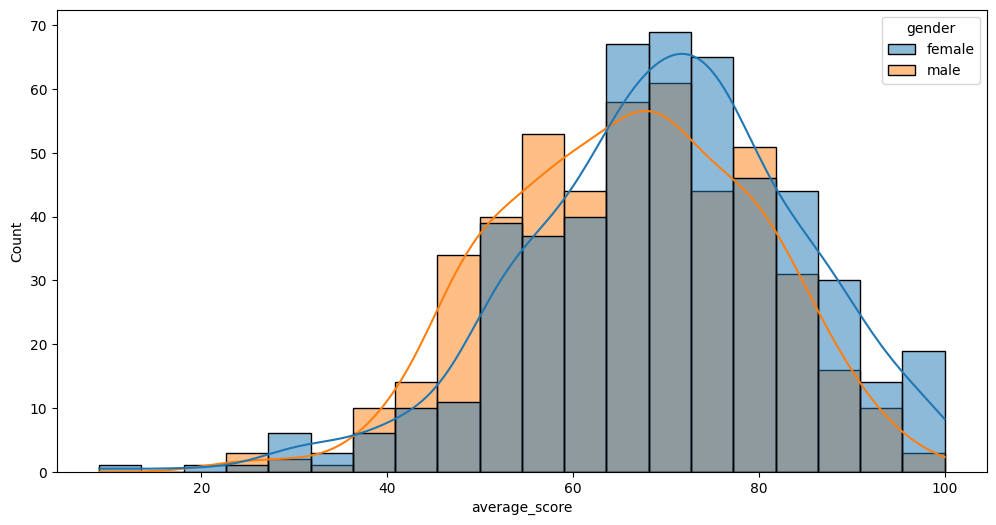

In [30]:
plt.figure(figsize=(12,6))
sns.histplot( data= df,x= 'average_score', hue= 'gender', bins= 20 , kde= True)
plt.show()

In [31]:
df.head()

,gender,ethinicity,parental level of education,lunch,test preparation course,total_score,average_score
0,female,group B,bachelor's degree,standard,none,218,72.67
1,female,group C,some college,standard,completed,247,82.33
2,female,group B,master's degree,standard,none,278,92.67
3,male,group A,associate's degree,free/reduced,none,148,49.33
4,male,group C,some college,standard,none,229,76.33


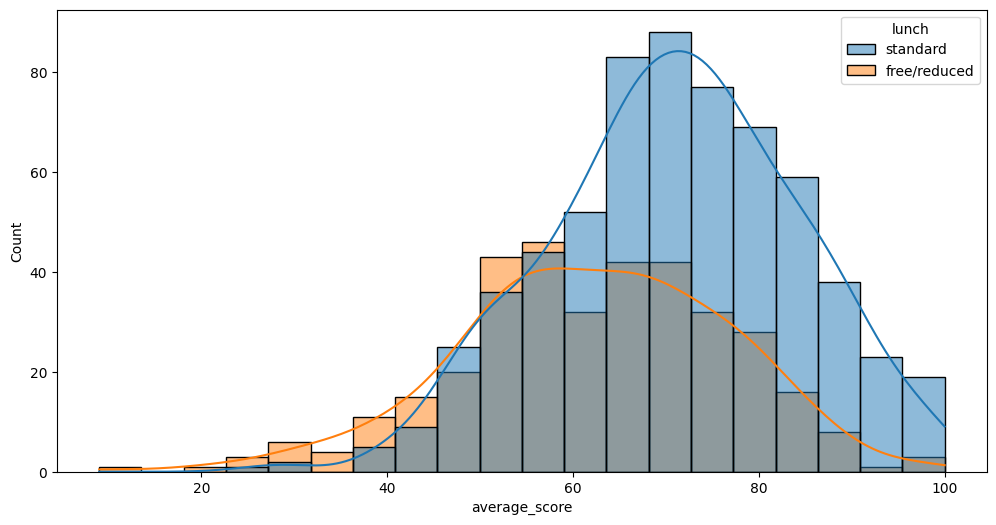

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(data= df, x= 'average_score', hue= 'lunch', kde= True, bins= 20)

plt.show()

<Axes: xlabel='average_score', ylabel='Count'>

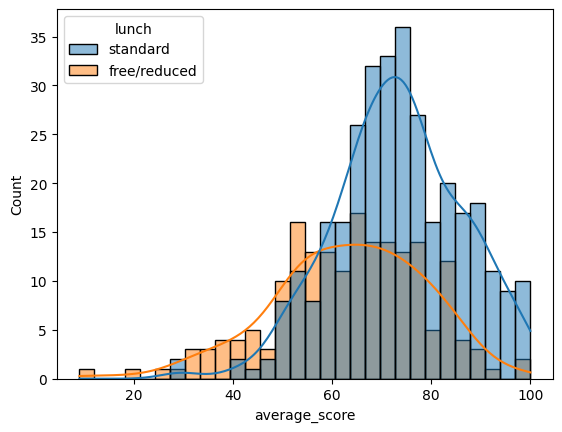

In [37]:
sns.histplot(data= df[df['gender']=='female'], x= 'average_score', hue= 'lunch',kde= True , color= 'g', bins= 30)

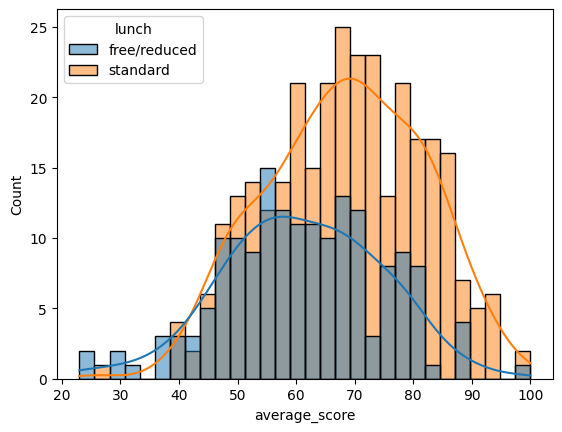

In [38]:
sns.histplot(data= df[df['gender']=='male'], x= 'average_score', hue= 'lunch', kde= True, bins= 30)
plt.show()

In [39]:
df.sample(2)

,gender,ethinicity,parental level of education,lunch,test preparation course,total_score,average_score
610,male,group D,some college,free/reduced,completed,192,64.0
494,female,group B,high school,standard,none,186,62.0


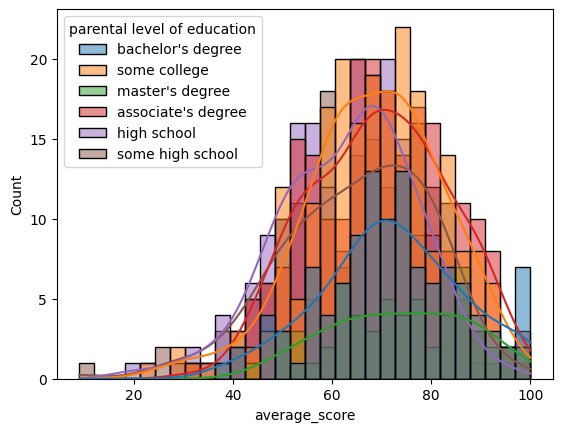

In [41]:
sns.histplot(data= df, x= 'average_score', hue= 'parental level of education', kde= True, bins= 30)
plt.show()

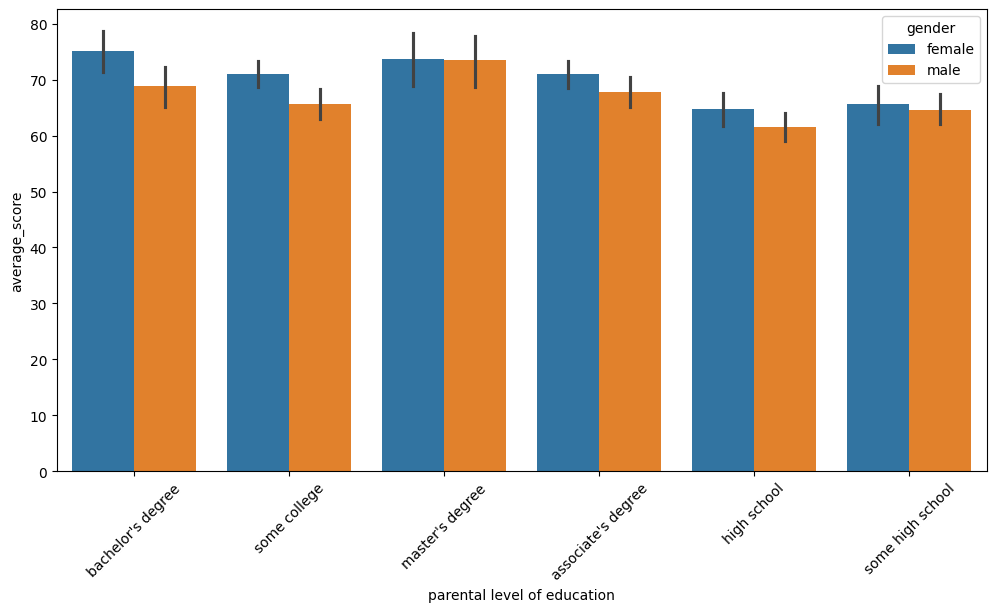

In [44]:

plt.figure(figsize=(12,6))
sns.barplot(data= df, x= 'parental level of education', y= 'average_score',hue= 'gender')
plt.xticks(rotation= 45)
plt.show()

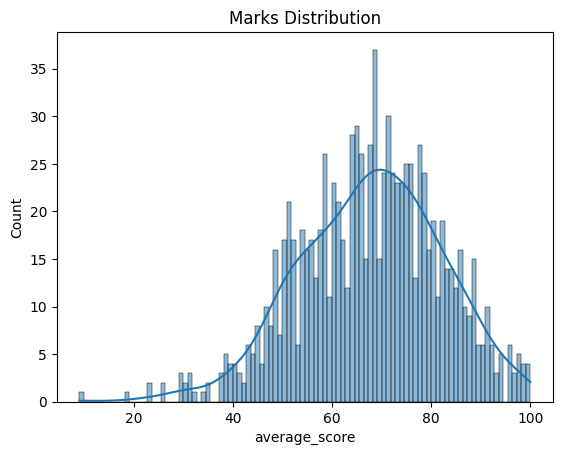

In [47]:
sns.histplot(data= df, x= 'average_score', bins= 100, kde= True)
plt.title('Marks Distribution')
plt.show()

In [50]:
df.sample(1)

,gender,ethinicity,parental level of education,lunch,test preparation course,total_score,average_score
931,male,group D,some college,free/reduced,none,181,60.33


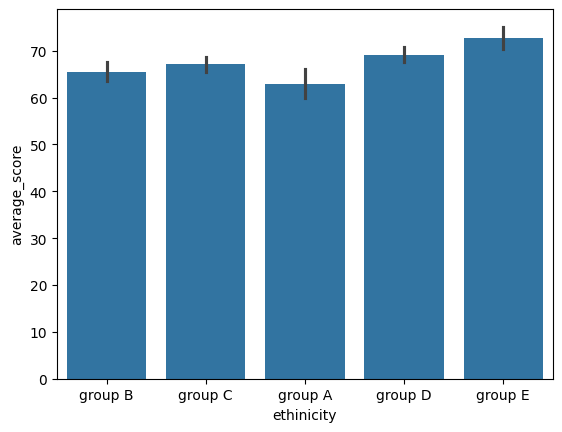

In [52]:
sns.barplot( data= df, x= 'ethinicity', y= 'average_score')
plt.show()

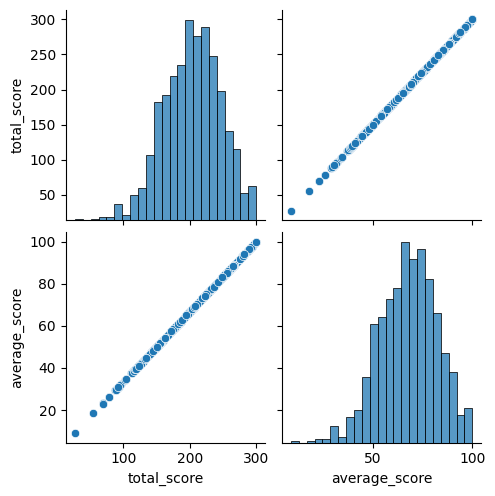

In [54]:
sns.pairplot(data=df[:])
plt.show()

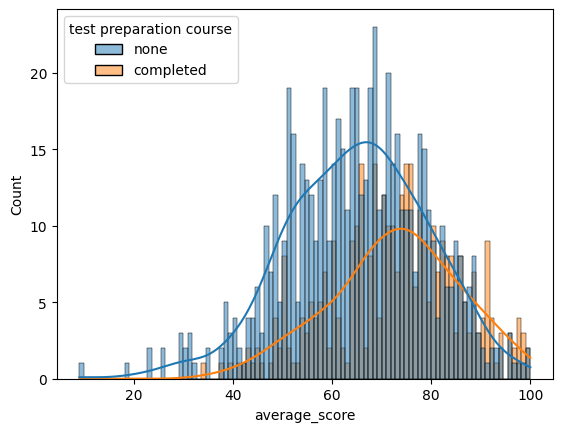

In [55]:
sns.histplot(data= df, x= 'average_score', hue= 'test preparation course', kde= True, bins= 100)
plt.show()

In [60]:
a= df['ethinicity'].value_counts()

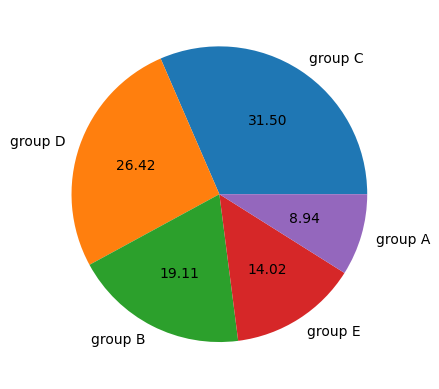

In [61]:
plt.pie(a.values, labels= a.index, autopct= '%.2f')
plt.show()


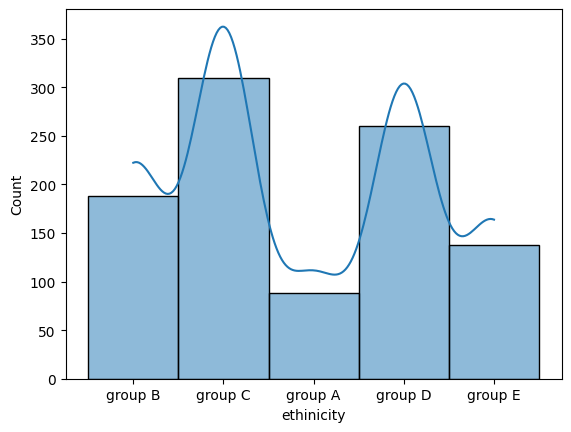

In [62]:
sns.histplot(data=df['ethinicity'], kde= True, bins= 100)
plt.show()

In [63]:
df.sample(2)

,gender,ethinicity,parental level of education,lunch,test preparation course,total_score,average_score
34,male,group E,some college,standard,none,266,88.67
238,male,group B,some college,standard,none,157,52.33


C:\Users\Tahsin\AppData\Local\Temp\ipykernel_12348\2709792388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sns.countplot(data= df, x= column, palette= 'PuBu')


<Axes: xlabel='gender', ylabel='count'>

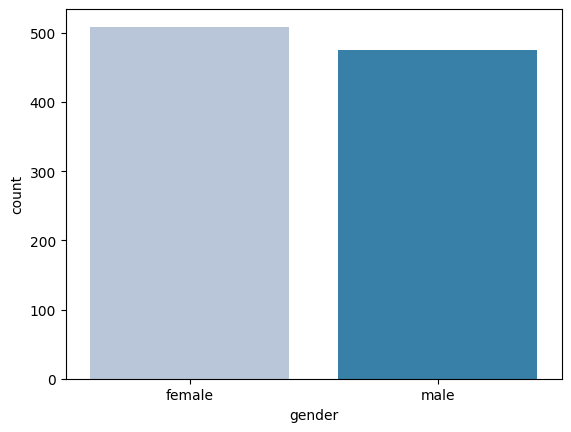

In [ ]:
def count_plot(column):
    return sns.countplot(data= df, x= column, palette= 'PuBu')


count_plot('gender')

C:\Users\Tahsin\AppData\Local\Temp\ipykernel_12348\2709792388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sns.countplot(data= df, x= column, palette= 'PuBu')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

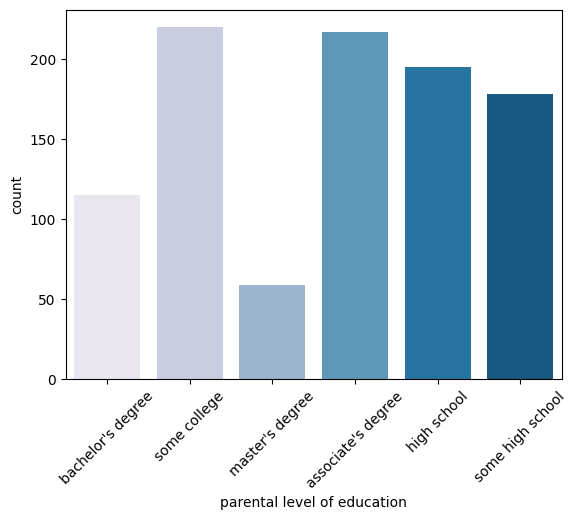

In [69]:
count_plot('parental level of education')
plt.xticks(rotation= 45)

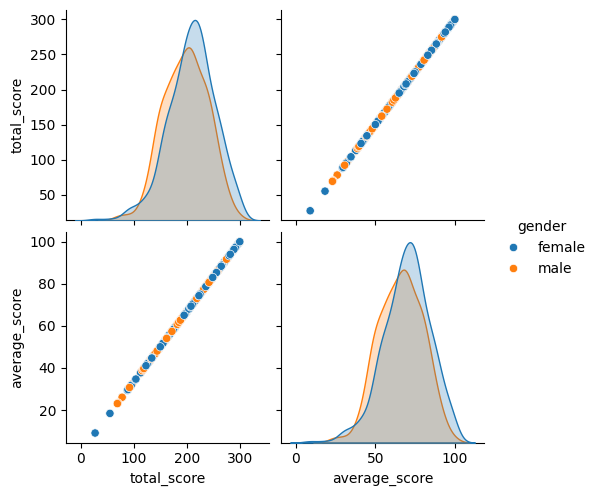

In [70]:
sns.pairplot(data= df, hue='gender')
plt.show()

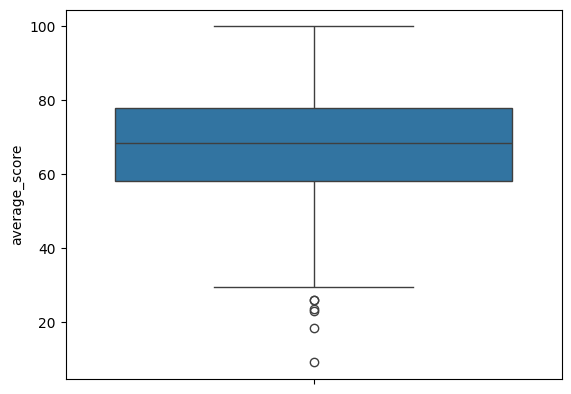

In [71]:
sns.boxplot(data= df['average_score'])
plt.show()

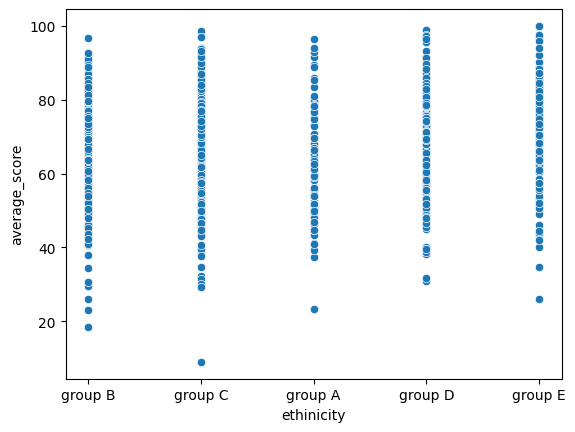

In [73]:
sns.scatterplot(data= df, x= 'ethinicity', y= 'average_score')
plt.show()

C:\Users\Tahsin\AppData\Local\Temp\ipykernel_12348\2204779472.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df['average_score'],palette= 'PuBu')


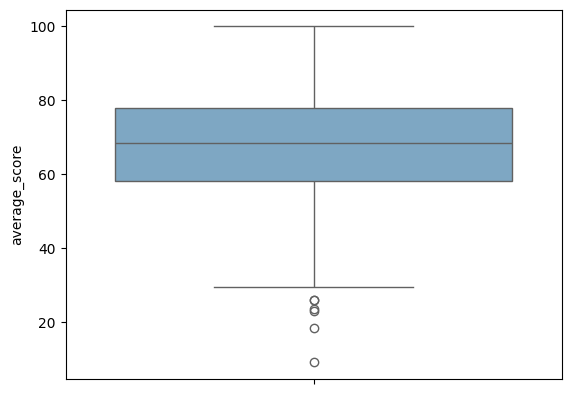

In [91]:
sns.boxplot(data= df['average_score'],palette= 'PuBu')
plt.show()